# Introduzione a Python
Si veda: [https://docs.python.org/3/tutorial](https://docs.python.org/3/tutorial/)

## Principi della programmazione in Python
- Variabili e tipizzazione dinamica
- Assenza di informazione e valori <i>None</i>

In [ ]:
a = 4
b = 'questa è "una" stringa'
c = '6'

## Tipi elementari
- Stringhe
- Tipi numerici
- Date

In [ ]:
x = None
x is not None

## Esempio 1: Indovina un numero

- *La macchina pensa un numero*
    - *intero e entro un minimo e massimo*
- *La macchina chiede all'utente un numero*
- *La macchina compara il numero con quello da indovinare*
- La macchina fornisce un feedback all'utente
- Questa cosa va fatta fino a indovinare

In [1]:
import numpy.random as rn

In [2]:
def think_number(minn=0, maxn=20):
    x = rn.randint(low=minn, high=maxn)
    return x

## Istruzioni condizionali
- Flusso di esecuzione delle istruzioni
- ``if``, ``elif`` e ``else``

In [ ]:
n = think_number()
i = input('dimmi un numero: ')
try:
    trial = int(i)
except ValueError:
    i = input('HO DETTO UN NUMERO! ')
    try:
        trial = int(i)
    except ValueError:
        i = 5
if trial == n:
    print("BRAVO")
elif trial < n:
    print("Numero troppo basso")
else:
    print("Numero troppo alto")
print(n)


## Cicli
- istruzione `while`
- istruzione `for`

In [3]:
from IPython.display import clear_output
import time

In [4]:
x = 0
while x <= 4:
    x = x + 1
    print(x)

1
2
3
4
5


In [10]:
for x in range(2, 10, 2):
    print(x)

2
4
6
8


In [12]:
n = think_number()
m = 6
for iteration in range(m):
    # clear_output(wait=True)
    print('Partita numero ', iteration)
    i = input('dimmi un numero: ')
    try:
        trial = int(i)
    except ValueError:
        i = input('HO DETTO UN NUMERO! ')
        try:
            trial = int(i)
        except ValueError:
            i = 5
    if trial == n:
        print("BRAVO")
        break
    elif trial < n:
        print("Numero troppo basso")
    else:
        print("Numero troppo alto")
    # time.sleep(10)
print(n)

Partita numero  0
dimmi un numero: 6
Numero troppo alto
Partita numero  1
dimmi un numero: 6
Numero troppo alto
Partita numero  2
dimmi un numero: 6
Numero troppo alto
Partita numero  3
dimmi un numero: 6
Numero troppo alto
Partita numero  4
dimmi un numero: 6
Numero troppo alto
Partita numero  5
dimmi un numero: 6
Numero troppo alto
1


## Simulatore
- modificare `number_game` per prendere input e dare output a un'altra funzione
- implementare una funzione per giocare
    - più stategie di gioco
    - raccolta statistiche (numero di tentativi per partita)

In [17]:
import numpy as np

In [93]:
def init_game(start = 1, end = 10):
    n = rn.randint(start, end)
    return n

def evaluate_guess(trial, correct_number):
    return np.sign(trial - correct_number)

def random_player(start, end, correct_number, max_iterations):
    final = max_iterations
    for game in range(max_iterations):
        trial = rn.randint(start, end)
        feedback = evaluate_guess(trial, correct_number)
        if feedback == 0:
            final = game
            break
    return final

def one_player(start, end, correct_number, max_iterations):
    final = max_iterations
    for game in range(max_iterations):
        trial = rn.randint(start, end)
        feedback = evaluate_guess(trial, correct_number)
        if feedback == 0:
            final = game
            break
        if feedback < 0:
            start = trial
        else:
            end = trial
    return final

In [123]:
s, e, i = 0, 100, 500
n = init_game(s, e)
history_rp = []
history_op = []
for test in range(1000):
    o = random_player(s, e, n, i)
    j = one_player(s, e, n, i)
    history_rp.append(o)
    history_op.append(j)
O = np.array([history_rp, history_op]).T

In [143]:
s, e, i = 0, 100, 500
n = init_game(s, e)
O = np.array([[random_player(s, e, n, i), one_player(s, e, n, i)] for x in range(1000)])

In [145]:
O

array([[ 14,   2],
       [ 85,  10],
       [227,   5],
       ...,
       [  1,  12],
       [203,   2],
       [141,   5]])

In [128]:
O.mean(axis=0)

array([99.718,  6.789])

In [95]:
sum(history_rp) / len(history_rp)

96.337

In [96]:
sum(history_op) / len(history_op)

7.724

In [146]:
import matplotlib.pyplot as plt

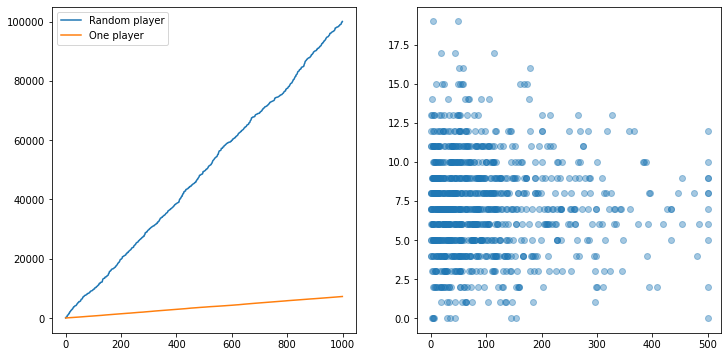

In [158]:
fig, ax = plt.subplots(figsize=(12, 6), ncols=2)
ax[0].plot(np.cumsum(O[:,0]), label='Random player')
ax[0].plot(np.cumsum(O[:,1]), label='One player')
ax[1].scatter(O[:,0], O[:,1], alpha=0.4)
ax[0].legend()
plt.show()

## Liste

In [104]:
s = 0
a = [[2, 3, 6], [6, 7, 9]]
print(a[1][1])

7


In [135]:
e = [x**2 for x in range(0, 11, 2) if x != 4]
e

[0, 4, 36, 64, 100]

In [105]:
b = np.array(a)

In [109]:
print(b)

[[2 3 6]
 [6 7 9]]


In [110]:
b.shape

(2, 3)

In [116]:
b.dot(b.T)

array([[ 49,  87],
       [ 87, 166]])

In [120]:
b.mean(axis=1)

array([3.66666667, 7.33333333])

In [113]:
print(b[:,-2:])

[[3 6]
 [7 9]]


In [84]:
st = 'obgect does not support'
g = list(st)
g[2] = 'j'
st = "".join(g)

In [85]:
st

'object does not support'

In [92]:
";".join(['e', 'p'])

'e;p'

# Programmazione a oggetti

**Banco**
- metodi
    - genera un numero
    - verifica i tentativi
- proprietà
    - numero da indovinare
    - range

**Giocatore**

In [212]:
class Dealer(object):
    
    def __init__(self, start=0, end=10):
        self.s = start
        self.e = end
        self.deal()
        
    def __str__(self):
        return "Dealer with start {} and end {}".format(self.s, self.e)
    
    def deal(self):
        self.n = rn.randint(self.s, self.e)
        
    def check(self, trial):
        return np.sign(trial - self.n)

In [213]:
start, end = 0, 100
d = Dealer(start, end)
r = Dealer(start=20, end=200)

In [211]:
str(d)

'Dealer with start 0 and end 100'

In [203]:
d.deal()

In [204]:
d.n

31

## Filesystem e salvataggio file
- creare una cartella superiore che si chiama `stats_data`
- salvare in `stats_data` il file con i risultati che si chiamerà `guess_number`

In [ ]:
import os
import json

## Dictionary

## Gestione dell'errore
- Concetto di eccezione
- ``try``, ``except``, ``raise``

# Uso avanzato di liste e dizionari
- _List slice_ e _list comprehension_
- Il modulo <i>collections</i>: defaultdict e counter
- Iteratori, <i>enumerate</i>, cicli

## Input e output da file